# 第五次恒星物理编程作业

## 第一小题

描写白矮星结构的微分方程:  
$\frac{1}{z^2}\frac{d}{dz}\left(z^2\frac{du}{dz}\right)+\left(u^2-\frac{1}{x_{c}^2}\right)^\frac{3}{2}=0$  
$x_{c}\to\infty$为完全相对论情况, $x_{c}\to1$为完全非相对论情况  
上微分方程在中心处的边界条件为$u(z=0)=1, u^{\prime}(z=0)=0$  
在给定$x_{c}$后，可以对上述微分方程由中心向外进行积分，积分到表面处所得到的z值表示为$z_{s}$，可得表面处的一些数值$\xi_{s}=0,x_{s}=1,u_{s}=\frac{1}{x_{c}}$  

白矮星半径  
$R=Az_{s}=\sqrt{\frac{2C_{1}}{\pi G}}\cdot\frac{1}{C_{2}x_{c}}z_{s}$  
白矮星质量  
$\begin{align*}M=\int_{0}^{R}4\pi r^2\rho dr&=4\pi A^{3}C_{2}x_{c}^{3}\int_{0}^{u_{s}}z^{2}\left(u^2-\frac{1}{x_{c}^{2}}\right)^{\frac{3}{2}}dz\\
&=4\pi A^{3}C_{2}x_{c}^{3}\left(-z^2\frac{du}{dz}\right)_{s}\\
&=\frac{4\pi}{C_{2}^{2}}\left(\frac{2C_{1}}{\pi G}\right)^{\frac{3}{2}}\left(-z^2\frac{du}{dz}\right)_{s}\end{align*}$  
其中  
$C_{1}=\frac{\pi m_{e}^{4}c^{5}}{3h^3}, C_{2}=\frac{8\pi m_{e}^{3}c^{3}m_{p}\mu_{e}}{3h^3}$

采取与第四次编程作业同样的方法解方程，将方程化为:  
$\frac{d^2u}{dz^2}+\frac{2}{z}\frac{du}{dz}+\left(u^2-\frac{1}{x_{c}^2}\right)^{\frac{3}{2}}=0$  
化为一阶方程组:  
$\begin{cases}\frac{du}{dz}=u^{\prime}\\\frac{du^{\prime}}{dz}=-\left(u^2-\frac{1}{x_{c}^2}\right)^{\frac{3}{2}}-\frac{2}{z}u^{\prime}=f\left(z,u,u^{\prime}\right)\\u(z=0)=1\\u^{\prime}(z=0)=0\end{cases}$  
预估-校正公式:  
$\begin{pmatrix} \bar{u}_{n+1}\\ \bar{u^{\prime}}_{n+1} \end{pmatrix}=\begin{pmatrix} u_{n}\\ u^{\prime}_{n}\end{pmatrix}+h\begin{pmatrix} u^{\prime}_{n} \\ f\left(z_{n},u_{n},u^{\prime}_{n}\right)\end{pmatrix}$  
$\begin{pmatrix} u_{n+1} \\ u^{\prime}_{n+1}\end{pmatrix}=\begin{pmatrix} u_{n} \\ u^{\prime}_{n}\end{pmatrix}+\frac{h}{2}\Biggl[\begin{pmatrix} u^{\prime}_{n} \\ f\left(z_{n},u_{n},u^{\prime}_{n}\right)\end{pmatrix}+\begin{pmatrix} \bar{u^{\prime}}_{n+1} \\ f\left(z_{n+1},\bar{u}_{n+1},\bar{u^{\prime}}_{n+1}\right) \end{pmatrix}\Biggr]$

In [1]:
import scipy.constants as C
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(re_x_c, z, u, up):
    h = 1e-10
    a = u**2-re_x_c**2
    if z==0:#z=0时会出现0/0
        val = -np.power(a,3./2)-2./h*up
    else:
        val = -np.power(a,3./2)-2./z*up
    return val

In [3]:
def solve_eos(re_x_c):
    z = 0
    u = 1
    up = 0
    h = 0.01
    while abs(u-re_x_c)>=1e-3:
        u_temp = u
        up_temp = up
        u_bar = u_temp + h*up_temp
        up_bar = up_temp + h*f(re_x_c, z, u_temp, up_temp)
        u = u_temp+h/2*(up_temp+up_bar)
        up = up_temp+h/2*(f(re_x_c, z, u_temp, up_temp)+f(re_x_c, z+h, u_bar, up_bar))
        z = z+h
    return z,up

In [4]:
C_1 = C.pi*((C.m_e)**4)*((C.c)**5)/3/((C.h)**3)
C_2_dmu = 8*C.pi*((C.m_e)**3)*((C.c)**3)*C.m_p/3/((C.h)**3)

In [5]:
re_x_c_set = np.linspace(0,1,100)#1/x_c从0取到1 
R = np.zeros(100)
M = np.zeros(100)
z = np.zeros(100)
up = np.zeros(100)

In [6]:
i=0
for re_x_c in re_x_c_set:
    z_s,up_s = solve_eos(re_x_c)
    z[i]=z_s
    up[i]=up_s
    i=i+1
R = z*re_x_c_set
M = -np.power(z,2)*up

In [7]:
R_sun = 6.955e8
M_sun = 1.98855e30
C_2_1 = C_2_dmu*2         #mu_e=2
C_2_2 = C_2_dmu*2.15      #mu_e=2.15
t = 2*C_1/np.pi/C.G
A_1 = np.sqrt(t)/C_2_1
A_2 = np.sqrt(t)/C_2_2
B_1 = 4*np.pi/(C_2_1**2)*np.power(t,3./2)
B_2 = 4*np.pi/(C_2_2**2)*np.power(t,3./2)

In [8]:
R_1 = np.zeros(100)
R_2 = np.zeros(100)
M_1 = np.zeros(100)
M_2 = np.zeros(100)
R_1 = A_1*R/R_sun
R_2 = A_2*R/R_sun
M_1 = B_1*M/M_sun
M_2 = B_2*M/M_sun

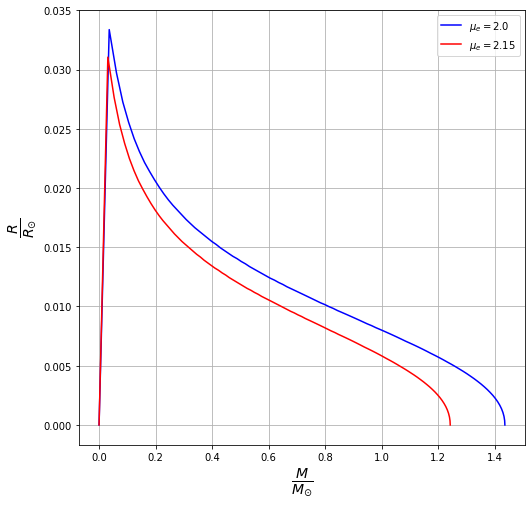

In [9]:
plt.figure(figsize=(8,8))
plt.plot(M_1,R_1,color='b',label=r'$\mu_e=2.0$')
plt.plot(M_2,R_2,color='r',label=r'$\mu_e=2.15$')
plt.grid()
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=20)
plt.ylabel(r'$\frac{R}{R_{\odot}}$',fontsize=20)
plt.legend()
plt.show()

发现在$M\to 0时有奇怪的行为$，计算后发现时$\frac{1}{x_c}=1$时$z_{s}=0, u^{\prime}_{s}=0$，去掉该点后重新做图

In [10]:
solve_eos(1)

(0, 0)

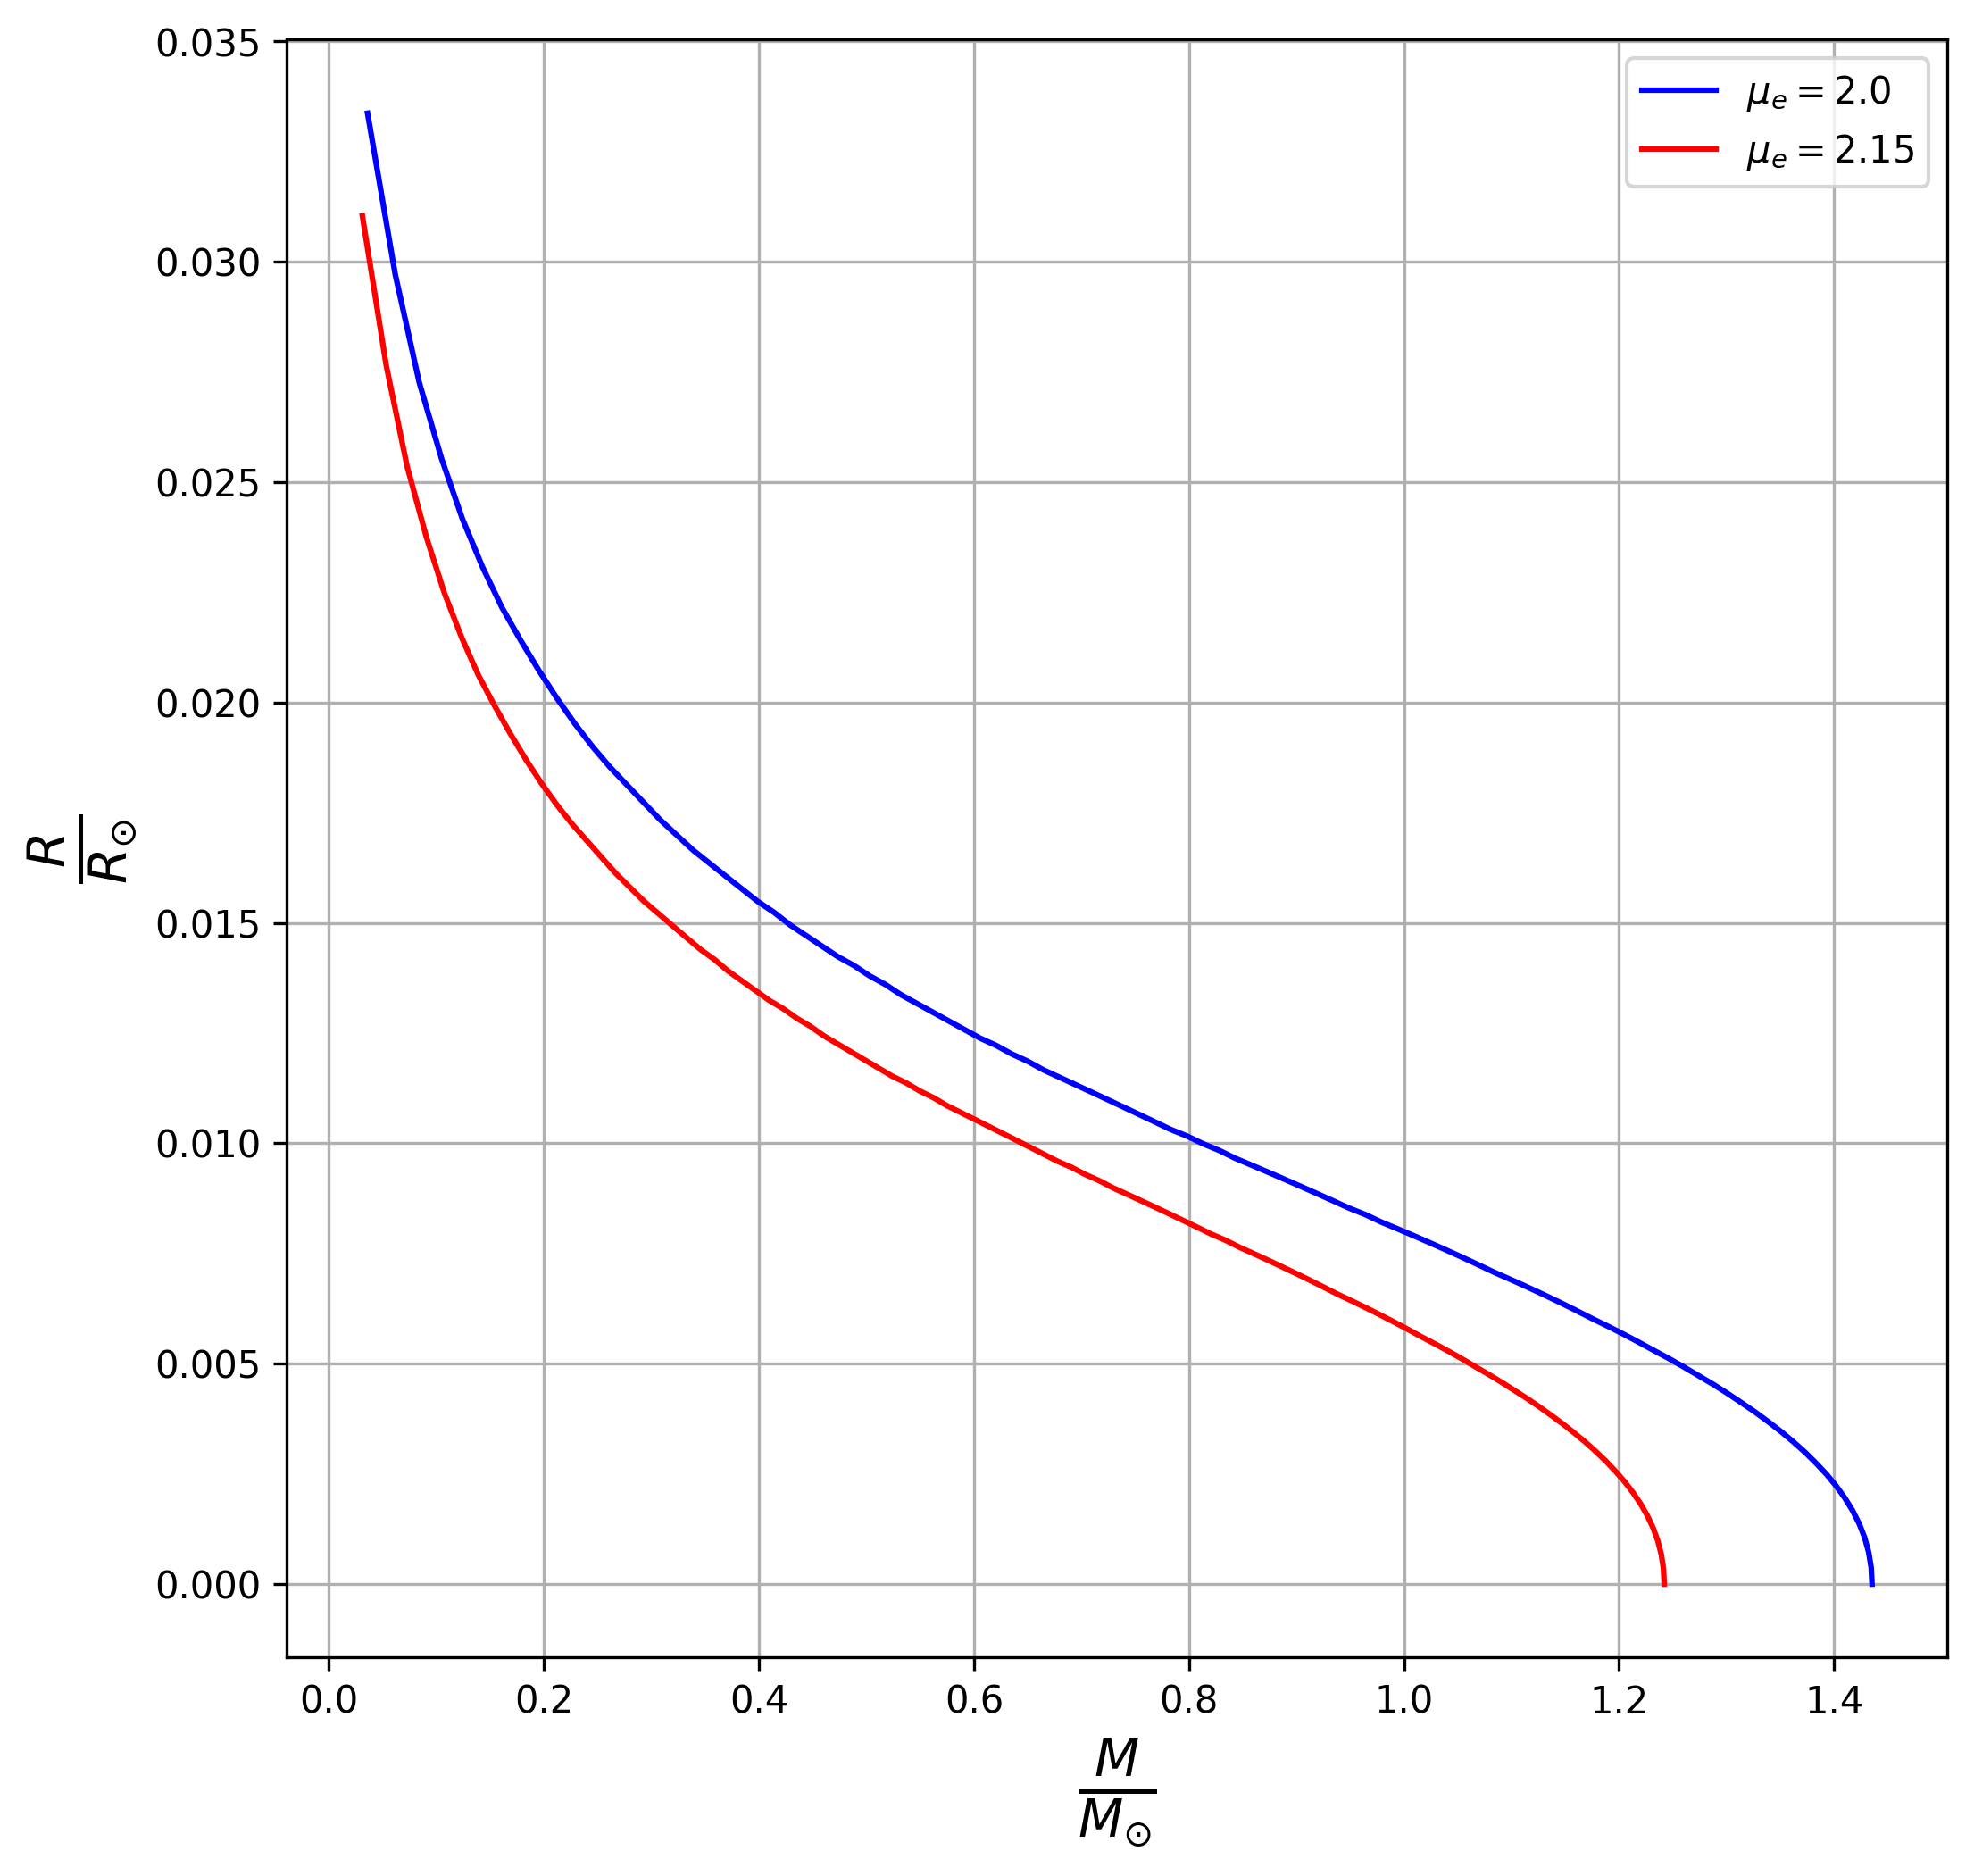

In [11]:
M_1_slice = M_1[:-1]
M_2_slice = M_2[:-1]
R_1_slice = R_1[:-1]
R_2_slice = R_2[:-1]
plt.figure(figsize=(8,8),dpi=300)
plt.plot(M_1_slice,R_1_slice,color='b',label=r'$\mu_e=2.0$')
plt.plot(M_2_slice,R_2_slice,color='r',label=r'$\mu_e=2.15$')
plt.grid()
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=20)
plt.ylabel(r'$\frac{R}{R_{\odot}}$',fontsize=20)
plt.legend()
plt.show()

## 第二小题

Eddington quartic equation:  
$1-\beta=0.003\left(\frac{\mu^2 M}{M\odot}\right)^2\beta^{4}$  
$\Rightarrow \beta_{k+1}=\beta_{k}-\frac{1-\beta_{k}-0.003x^2\beta_{k}^{4}}{-1-0.012x^2\beta_{k}^3}$

In [12]:
x = np.linspace(0,1000,100000)
beta = np.zeros(100000)

In [13]:
def phi(x,beta):
    val = (1-beta-0.003*(x**2)*(beta**4))/(-1-0.012*(x**2)*(beta**3))
    return val

In [14]:
i = 0
while i<=10000:
    beta = beta-phi(x,beta)
    i=i+1


$log_{1000}x=\frac{lgx}{lg1000}=\frac{1}{3}lgx$

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


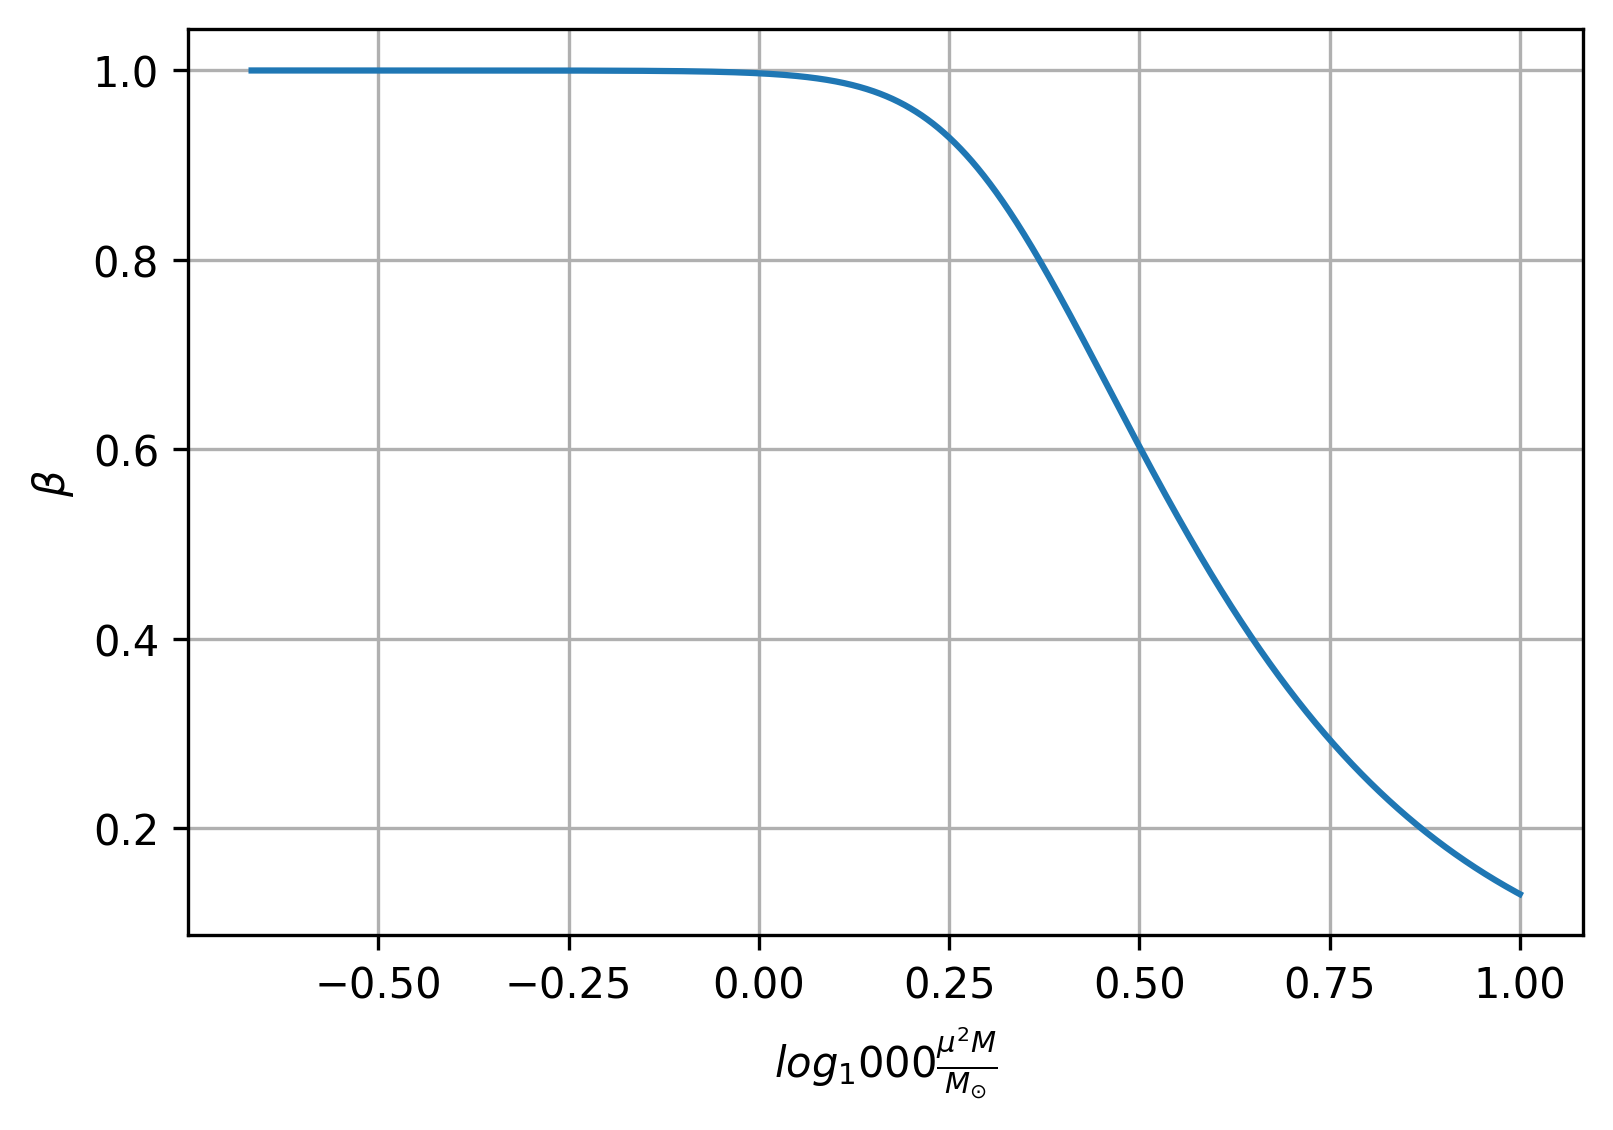

In [15]:
x = np.log10(x)/3
plt.figure(dpi=300)
plt.plot(x,beta)
plt.grid()
plt.xlabel(r'$log_1000\frac{\mu^2 M}{M_{\odot}}$')
plt.ylabel(r'$\beta$')
plt.show()